# PROBLEM STATEMENT

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn import tree
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score

#### DATA Info

In [2]:
data=pd.read_csv("ola_driver_scaler.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [4]:
data.head(4)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [5]:
data.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [6]:
data[['MMM-YY','Dateofjoining']]=data[['MMM-YY','Dateofjoining']].apply(pd.to_datetime)

In [7]:
data.rename(columns={'MMM-YY':'Reporting_date'},inplace=True)

In [8]:
data.drop(columns='Unnamed: 0',inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Reporting_date        19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   object        
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [10]:
data.isna().sum()

Reporting_date              0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [11]:
data.nunique()

Reporting_date             24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

#### Data PreProcessing 

In [12]:
df=data.copy(deep=True)

In [13]:
df.head(2)

,Reporting_date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,-665480,2


In [64]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

Reporting_date              0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

##### KNN IMPUTER

In [15]:
impute = df[['Age','Gender']]
imputer = KNNImputer(n_neighbors=5)
imputation = imputer.fit_transform(impute)
temp = pd.DataFrame(imputation)

In [16]:
df["Age"]=temp[0]
df["Gender"]=temp[1]

In [17]:
df.isna().sum()

Reporting_date              0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [18]:
## Missing value of Age and Gender has been handled. Missing value of LAstWorkignDay will be used to create featurees.

In [19]:
data.head(10)

,Reporting_date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,03/11/19,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaN,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaN,2,2,0,1
5,2019-12-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaN,2,2,0,1
6,2020-01-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaN,2,2,0,1
7,2020-02-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaN,2,2,0,1
8,2020-03-01,4,43.0,0.0,C13,2,65603,2019-12-07,NaN,2,2,350000,1
9,2020-04-01,4,43.0,0.0,C13,2,65603,2019-12-07,27/04/20,2,2,0,1


#### Feature Engineering

In [20]:
ola=(df.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()
ola.rename(columns={'LastWorkingDate':'Target'},inplace=True)
ola["Target"].replace({True:1,False:0},inplace=True)
ola.head()

,Driver_ID,Target
0,1,0
1,2,1
2,4,0
3,5,0
4,6,1


In [21]:
## Checking if Quarterly rating has been improved
q1=(df.groupby('Driver_ID').agg({'Quarterly Rating':'first'})).reset_index()
q2=(df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})).reset_index()

In [22]:
print(q2.isna().sum(),q1.isna().sum())
print(q2.shape,q1.shape)

Driver_ID           0
Quarterly Rating    0
dtype: int64 Driver_ID           0
Quarterly Rating    0
dtype: int64
(2381, 2) (2381, 2)


In [23]:
ola = ola.merge(q1,on='Driver_ID')
ola = ola.merge(q2,on='Driver_ID')

In [24]:
ola['Improvement_rating']=np.where(ola['Quarterly Rating_x']==ola['Quarterly Rating_y'],0,1)

In [25]:
ola.head(1)

,Driver_ID,Target,Quarterly Rating_x,Quarterly Rating_y,Improvement_rating
0,1,0,2,2,0


In [26]:
## Checking if Income has been improved
inc1=(df.groupby('Driver_ID').agg({'Income':'first'})).reset_index()
inc2=(df.groupby('Driver_ID').agg({'Income':'last'})).reset_index()

In [27]:
print(q2.isna().sum(),q1.isna().sum())
print(q2.shape,q1.shape)

Driver_ID           0
Quarterly Rating    0
dtype: int64 Driver_ID           0
Quarterly Rating    0
dtype: int64
(2381, 2) (2381, 2)


In [28]:
ola = ola.merge(inc1,on='Driver_ID')
ola = ola.merge(inc2,on='Driver_ID')

In [29]:
ola['Raise']=np.where(ola['Income_x']==ola['Income_y'],0,1)

In [30]:
ola.head(1)

,Driver_ID,Target,Quarterly Rating_x,Quarterly Rating_y,Improvement_rating,Income_x,Income_y,Raise
0,1,0,2,2,0,57387,57387,0


In [31]:
ola=ola[['Driver_ID','Improvement_rating','Raise','Target']]

In [32]:
ola.head(2)

,Driver_ID,Improvement_rating,Raise,Target
0,1,0,0,0
1,2,0,0,1


In [33]:
df.head(1)

,Reporting_date,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,2381060,2


In [34]:
dict = {'Reporting_date':'count',
             'Driver_ID':'first',
             'Age':'max',
             'Gender':'last',
            'City':'last',
             'Education_Level':'last',
             'Dateofjoining':'first',
            'LastWorkingDate':'last',
             'Grade':'last',
             'Total Business Value':'sum',
            'Income':'sum',
             'Dateofjoining':'first',
             'LastWorkingDate':'last',
            'Joining Designation':'last',
             'Grade':'last',
             'Quarterly Rating':'first'}
df = df.groupby([df['Driver_ID']]).aggregate(dict)
df['month'] = pd.to_datetime(df['Dateofjoining']).dt.month
df['year'] = pd.DatetimeIndex(df['Dateofjoining']).year

In [35]:
df.reset_index(drop=True, inplace=True)
df = df.merge(ola,on='Driver_ID')
df.head()

,Reporting_date,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,Improvement_rating,Raise,Target
0,3,1,28.0,0.0,C23,2,2018-12-24,03/11/19,1,1715580,172161,1,2,12,2018,0,0,0
1,2,2,31.0,0.0,C7,2,2020-11-06,None,2,0,134032,2,1,11,2020,0,0,1
2,5,4,43.0,0.0,C13,2,2019-12-07,27/04/20,2,350000,328015,2,1,12,2019,0,0,0
3,3,5,29.0,0.0,C9,0,2019-01-09,03/07/19,1,120360,139104,1,1,1,2019,0,0,0
4,5,6,31.0,1.0,C11,1,2020-07-31,None,3,1265000,393640,3,1,7,2020,1,0,1


In [36]:
df.shape

(2381, 18)

In [37]:
df['Age'] = df['Age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Reporting_date        2381 non-null   int64         
 1   Driver_ID             2381 non-null   int64         
 2   Age                   2381 non-null   int64         
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Dateofjoining         2381 non-null   datetime64[ns]
 7   LastWorkingDate       1616 non-null   object        
 8   Grade                 2381 non-null   int64         
 9   Total Business Value  2381 non-null   int64         
 10  Income                2381 non-null   int64         
 11  Joining Designation   2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   int64         
 13  month             

In [38]:
df.drop(columns=['Dateofjoining','LastWorkingDate'],inplace=True)
df['Gender'].replace({'M':0,'F':1},inplace=True)
df['Gender'] = df['Gender'].astype('int64')

In [39]:
df.head(2)

,Reporting_date,Driver_ID,Age,Gender,City,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,Improvement_rating,Raise,Target
0,3,1,28,0,C23,2,1,1715580,172161,1,2,12,2018,0,0,0
1,2,2,31,0,C7,2,2,0,134032,2,1,11,2020,0,0,1


In [40]:
if df.isna().sum().sum()==0:
    print("No missing values ")
else:
    print("Missing Values present")

No missing values 


#### Data Visualization

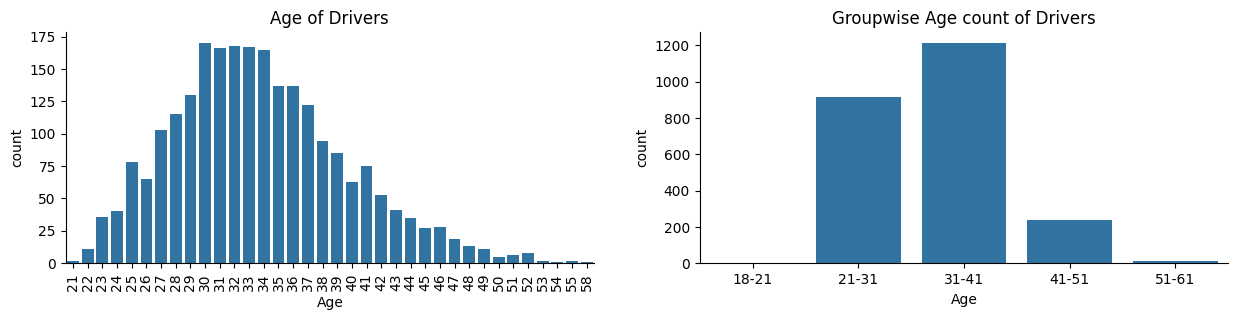

In [41]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(121)
sns.countplot(x=df["Age"])
plt.title('Age of Drivers')
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
a = pd.cut(df.Age,bins=[18,21,31,41,51,61],labels=['18-21','21-31','31-41','41-51','51-61'])
sns.countplot(x=a)
plt.title('Groupwise Age count of Drivers')
sns.despine()
plt.show()


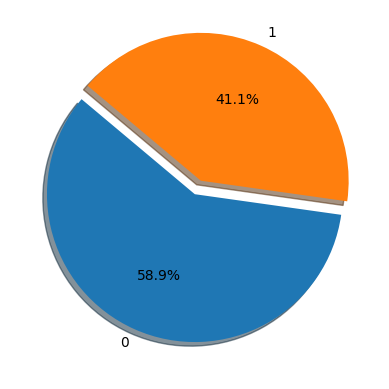

In [42]:
Gender_data=df['Gender'].value_counts()
plt.pie(Gender_data, labels=Gender_data.index, autopct='%1.1f%%', startangle=140,explode=(0,0.1),shadow=True)
plt.show()

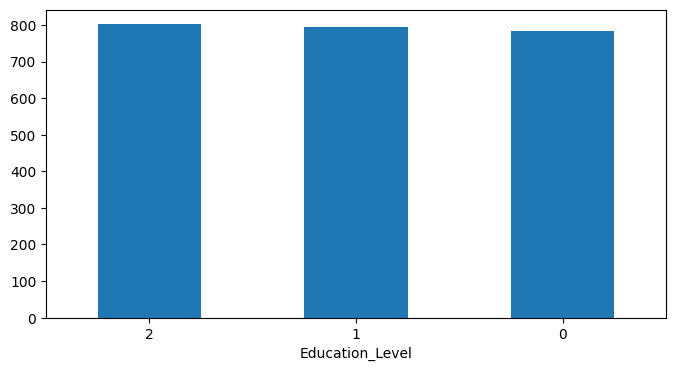

In [43]:
plt.figure(figsize=(8,4))
df['Education_Level'].value_counts().plot(kind='bar') 
plt.xticks(rotation=0)
plt.show()

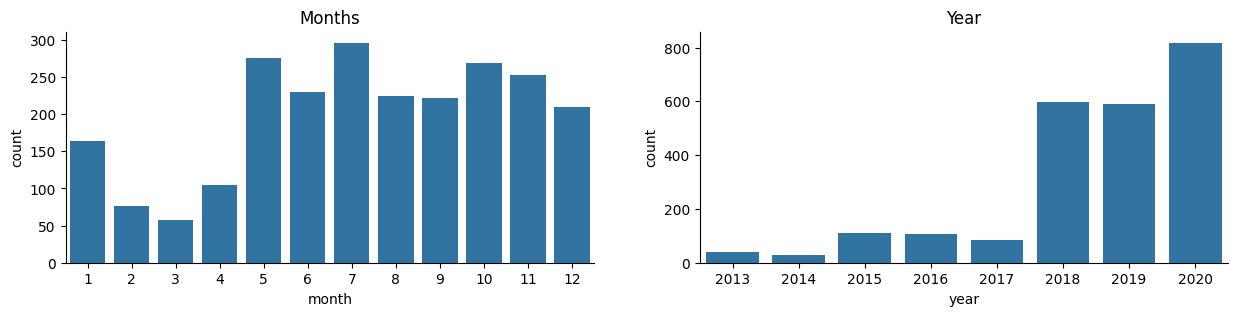

In [44]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(121)
sns.countplot(x=df["month"])
plt.title('Months')

ax = fig.add_subplot(122)
sns.countplot(x=df["year"])
plt.title('Year')
sns.despine()
plt.show()


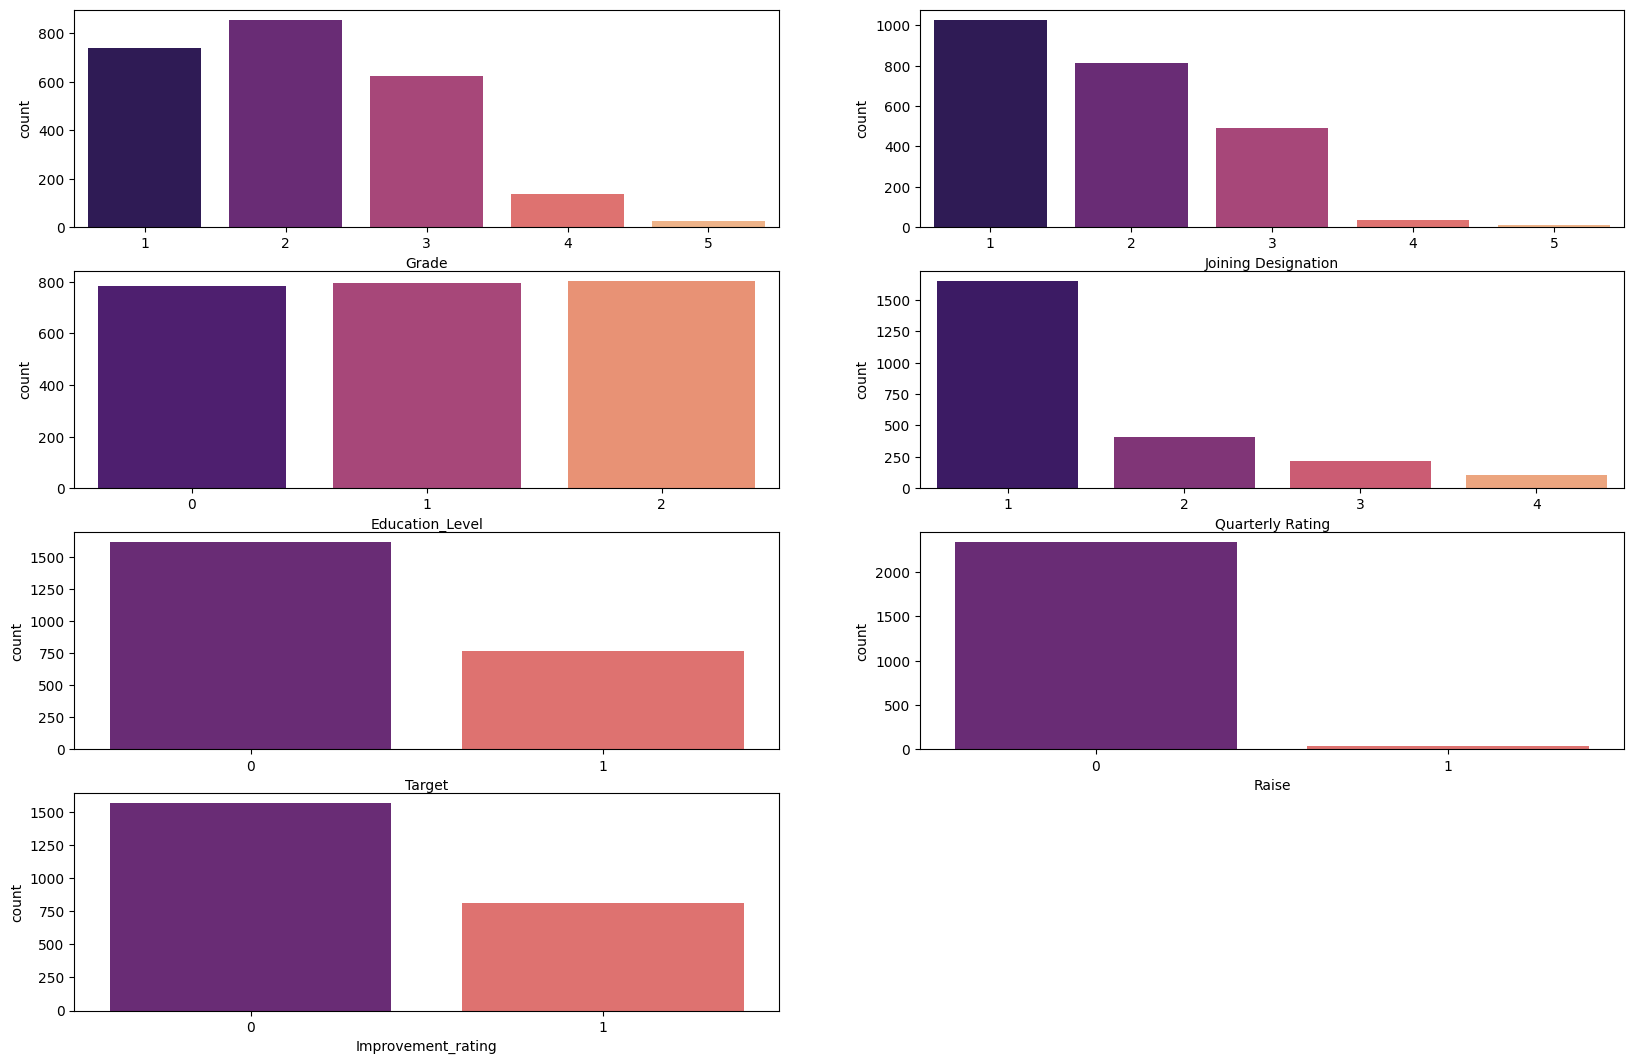

In [45]:
x=['Grade','Joining Designation','Education_Level','Quarterly Rating','Target','Raise','Improvement_rating']
y=1
plt.figure(figsize=(20,13))
for i in x:
    plt.subplot(4,2,y)
    sns.countplot(x=df[i],palette='magma')
    # plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
    y+=1
plt.show()

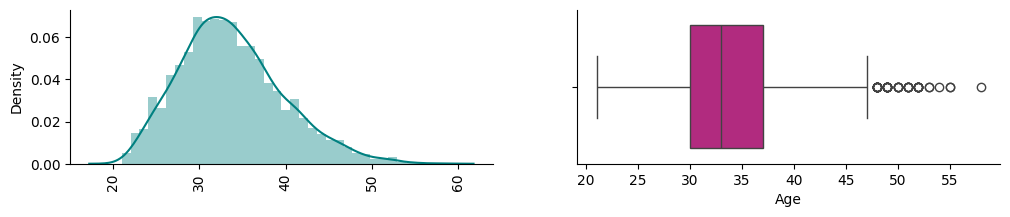

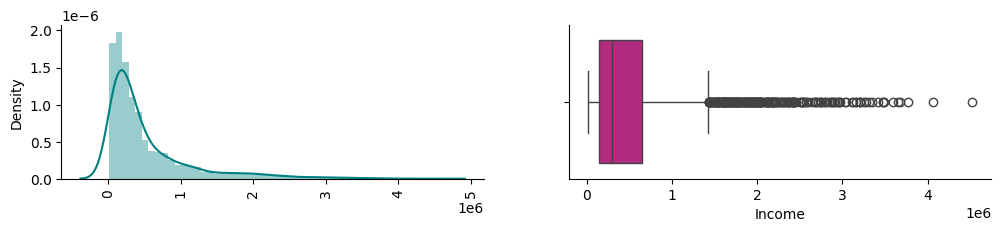

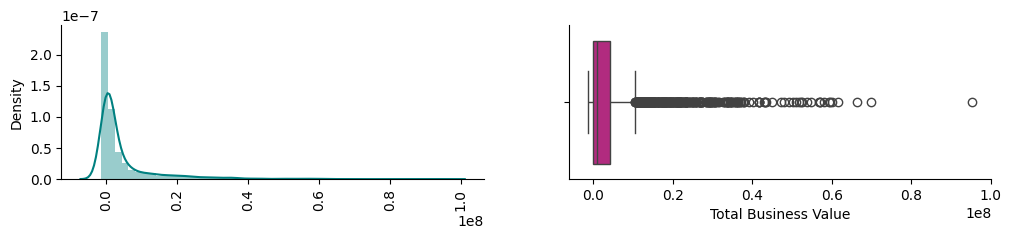

In [46]:
a =df[['Age','Income','Total Business Value']]
for i in a:
    plt.figure(figsize=(12,2))
    plt.subplot(121)
    sns.distplot(x=df[i],color='teal')
    plt.title('')
    plt.xticks(rotation=90)

    plt.subplot(122)
    sns.boxplot(x=df[i],color='mediumvioletred')
    plt.title('')
    sns.despine()
    plt.show()

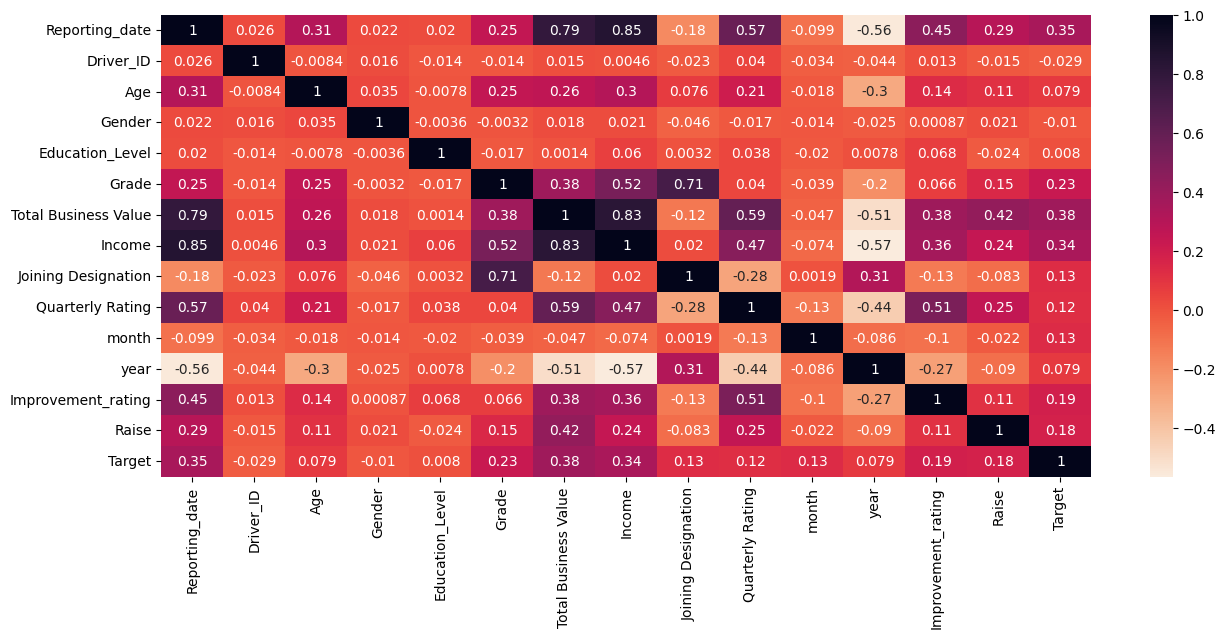

In [47]:
cor_col=['Reporting_date', 'Driver_ID', 'Age', 'Gender',
       'Education_Level', 'Grade', 'Total Business Value', 'Income',
       'Joining Designation', 'Quarterly Rating', 'month', 'year',
       'Improvement_rating', 'Raise', 'Target']

plt.figure(figsize=(15,6))
corr=df[cor_col].corr()
sns.heatmap(corr,annot=True,cmap='rocket_r')
plt.show()

highly correlated features are :
1. Reporting_date ,Total Business Value and Income
2. Grade and Joining designation
3. Quarterly rating and Total Business Value

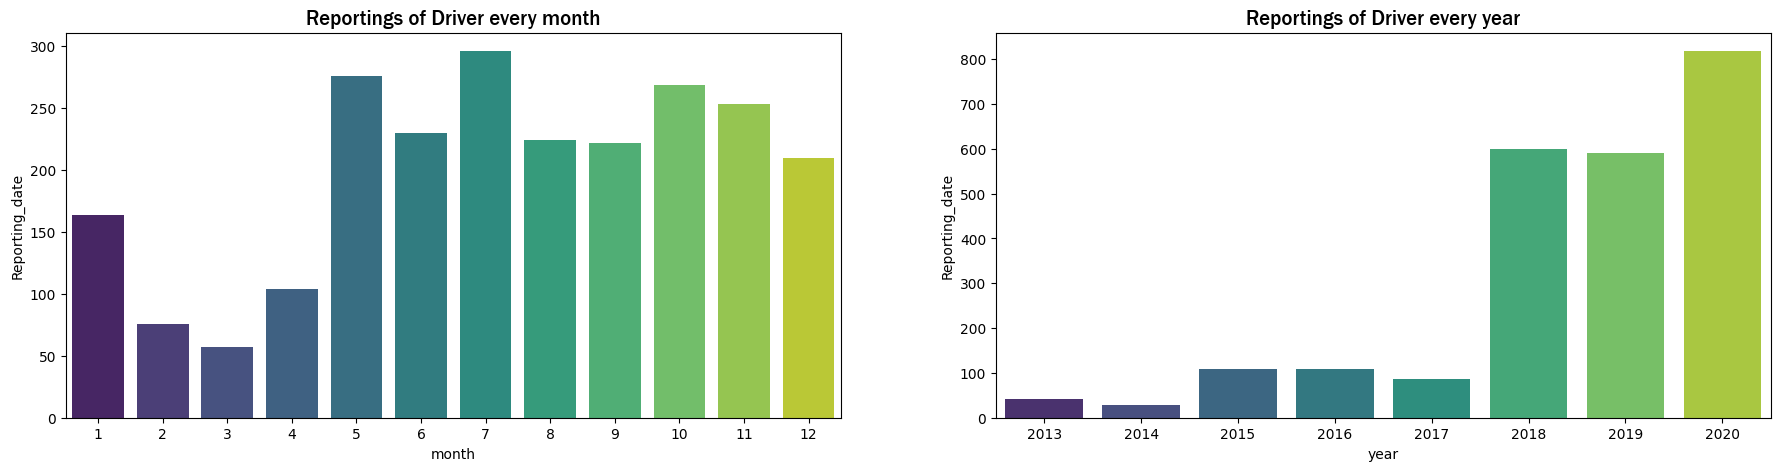

In [48]:
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(1,2,1)
grouped_months = df.groupby(['month'])['Reporting_date'].count().reset_index()
sns.barplot(data=grouped_months,x='month',y='Reporting_date',palette='viridis')
plt.title('Reportings of Driver every month',fontname='Franklin Gothic Medium', fontsize=15)

ax = fig.add_subplot(1,2,2)
grouped_years = df.groupby(['year'])['Reporting_date'].count().reset_index()
sns.barplot(x='year', y='Reporting_date', data=grouped_years,palette='viridis')
plt.title('Reportings of Driver every year',fontname='Franklin Gothic Medium', fontsize=15)

plt.show()


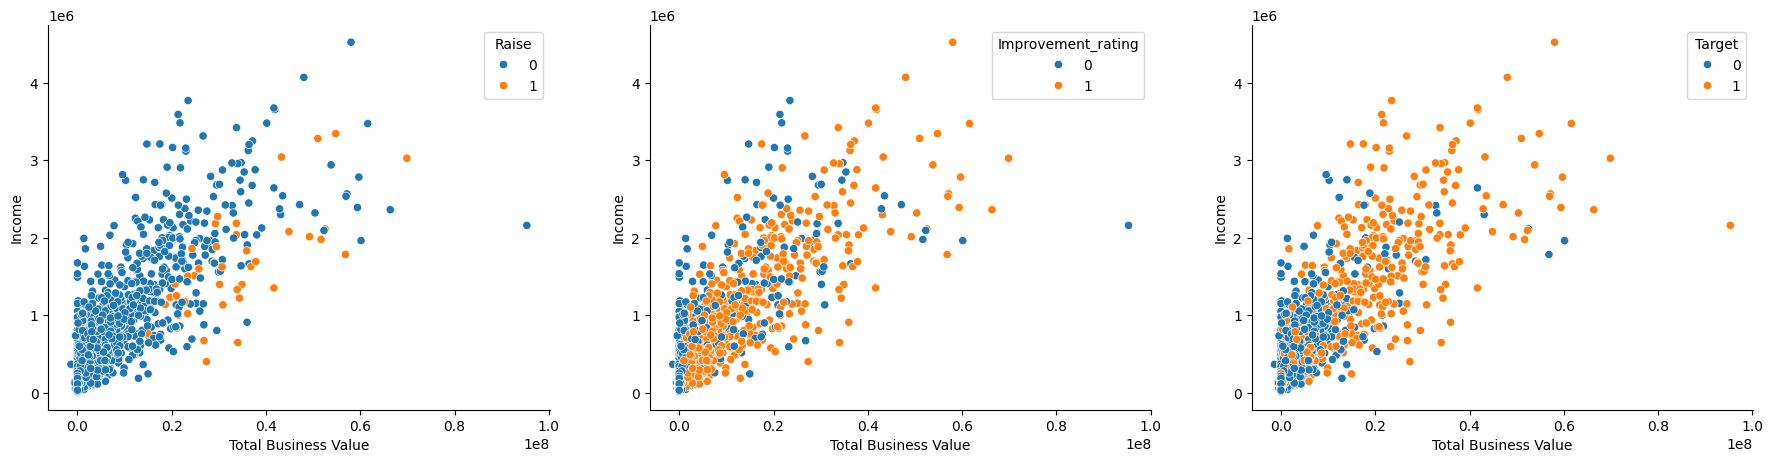

In [49]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df['Total Business Value'],y=df.Income,hue=df['Raise'])
plt.subplot(1,3,2)
sns.scatterplot(x=df['Total Business Value'],y=df.Income,hue=df['Improvement_rating'])
plt.subplot(1,3,3)
sns.scatterplot(x=df['Total Business Value'],y=df.Income,hue=df['Target'])
sns.despine()
plt.show()

Observations:
1. Most drivers comes from the age group of 21 to 40.
2. Drivers are from both genders while male drivers are little more but the difference is not quite much.
3. Drivers come equally from all education levels.
4. Huge growth of drivers joining post 2017. Most for 2020.
5. Driver not getting significant raise.
6. Ratings are not improved significantly.
7. Rating for first quarter is high and it decreases over the quarter.
8. Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.
9. Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.
10. Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.

#### ENSEMBLE

###### Encoding

In [50]:
Encoder = TargetEncoder()
df['City'] = Encoder.fit_transform(df['City'], df['Target'])
df['City'].value_counts().head(5)

City
0.269737    152
0.316833    101
0.468676     96
0.301089     93
0.404411     89
Name: count, dtype: int64

In [51]:
X = df.drop('Target',axis=1)
y = df['Target']

###### Train Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [53]:
Scaler= StandardScaler()
Scaler.fit_transform(X_train)

array([[-0.89285812, -1.0816992 , -0.98610167, ...,  0.91087143,
        -0.72501105, -0.13684514],
       [-0.45183377,  0.78873533,  0.02287509, ...,  0.29258295,
        -0.72501105, -0.13684514],
       [-0.89285812,  0.94728872, -1.15426446, ..., -0.94399403,
        -0.72501105, -0.13684514],
       ...,
       [-0.30482565, -0.09445661,  0.86368905, ..., -0.32570554,
        -0.72501105, -0.13684514],
       [-1.03986624,  0.14089608, -0.48161329, ...,  0.91087143,
        -0.72501105, -0.13684514],
       [-0.59884189, -0.49084008, -0.48161329, ...,  0.91087143,
        -0.72501105, -0.13684514]])

In [54]:
valid1 = cross_val_score(LogisticRegression(),X,y,cv=5)
print('Logistic Regression:',valid1.round(2))
print('Mean:',valid1.mean())
valid2 = cross_val_score( DecisionTreeClassifier(),X,y,cv=5)
print('Decision Tree:',valid2.round(3))
print('Mean:',valid2.mean())
valid3 = cross_val_score(RandomForestClassifier(),X,y,cv=5)
print('RandomForestClassifier():',valid3.round(2))
print('Mean:',valid3.mean())
valid4 = cross_val_score(GradientBoostingClassifier(),X,y,cv=5)
print('GradientBoostingClassifier:',valid4.round(3))
print('Mean:',valid4.mean())
valid5 =cross_val_score(XGBClassifier(),X,y,cv=5)
print('XGBoostClassifier:',valid1.round(2))
print('Mean:',valid5.mean())

Logistic Regression: [0.73 0.76 0.75 0.76 0.76]
Mean: 0.7522162324049116
Decision Tree: [0.876 0.905 0.874 0.908 0.872]
Mean: 0.8870267603896904
RandomForestClassifier(): [0.93 0.92 0.92 0.92 0.93]
Mean: 0.9235602417067457
GradientBoostingClassifier: [0.929 0.933 0.931 0.922 0.819]
Mean: 0.9067526381621832
XGBoostClassifier: [0.73 0.76 0.75 0.76 0.76]
Mean: 0.926919824533587


##### Class Imbalance Treatement

In [55]:
y_train.value_counts()

Target
0    1289
1     615
Name: count, dtype: int64

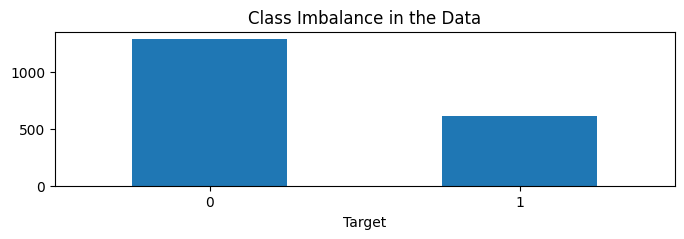

In [56]:
plt.figure(figsize=(8,2))
y_train.value_counts().plot(kind='bar')
plt.title('Class Imbalance in the Data')
plt.xticks(rotation=0)
plt.show()

In [57]:
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train.ravel())

In [58]:
X_train_smote.shape,y_train_smote.shape

((2578, 15), (2578,))

In [76]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train_smote, y_train_smote, test_size = 0.2, random_state= 42)

In [60]:
from collections import Counter
c = Counter(y_train_smote)
print(c)

Counter({1: 1289, 0: 1289})


#### Bagging

##### Random Forest

In [68]:
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10,11]
         }

In [71]:
RF_model = RandomForestClassifier()
clf = RandomizedSearchCV(RF_model, params, scoring = "accuracy", cv=10, n_jobs = -1, verbose = 5)

clf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 10],
                                        'max_features': [8, 9, 10, 11],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='accuracy', verbose=5)

In [72]:
# printing the best hyperparameters to be used to train our model
print(clf.best_estimator_)

RandomForestClassifier(max_depth=10, max_features=8, n_estimators=200)


In [73]:
# Training our model using the best hyperparameters
RF_model = clf.best_estimator_

RF_model.fit(X_train_smote, y_train_smote)

# Model accuracy of RFC
print("Model acc",RF_model.score(X_test, y_test))

Model acc 0.9287211740041929


In [ ]:
#using best estimators

In [77]:
train_scores = []
val_scores = []

l=1
u=20
d=1
num_learners=200
row_sampling_rate = 0.75


for depth in np.arange(l,u,d):
  clf = RandomForestClassifier(max_depth=depth, max_samples=row_sampling_rate, n_estimators=num_learners, random_state=0 )
  clf.fit(X_train, y_train)
  train_y_pred = clf.predict(X_train1)
  val_y_pred = clf.predict(X_val)
  train_score = f1_score(y_train1, train_y_pred)
  val_score = f1_score(y_val, val_y_pred)
  train_scores.append(train_score)
  val_scores.append(val_score)

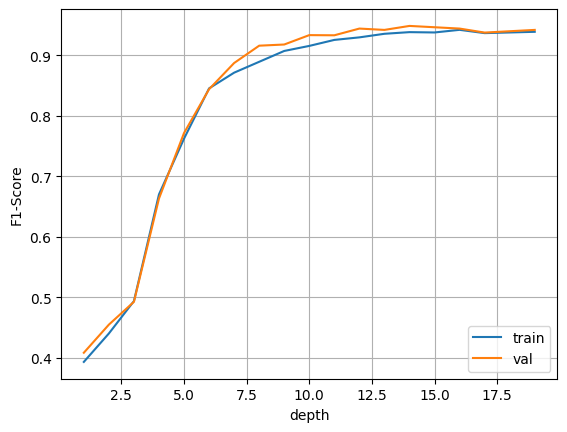

In [78]:
plt.figure()
plt.plot(list(np.arange(l,u,d)), train_scores, label="train")
plt.plot(list(np.arange(l,u,d)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("depth")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

#Best  depth from above graph and using Occam's Razor =8

In [79]:
# Model with depth_best and best estimators
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

best_idx = np.argmax(val_scores)
l_best = 8 #l+d*best_idx
RF_model_clf = RandomForestClassifier(max_depth=l_best, max_samples = row_sampling_rate, n_estimators=num_learners, random_state=0 )
RF_model_clf.fit(X_train1, y_train1)

y_pred_val = RF_model_clf.predict(X_val)
val_score = f1_score(y_val, y_pred_val)

print(val_score)

confusion_matrix(y_val, y_pred_val)

0.9142857142857143


array([[231,  31],
       [ 14, 240]], dtype=int64)

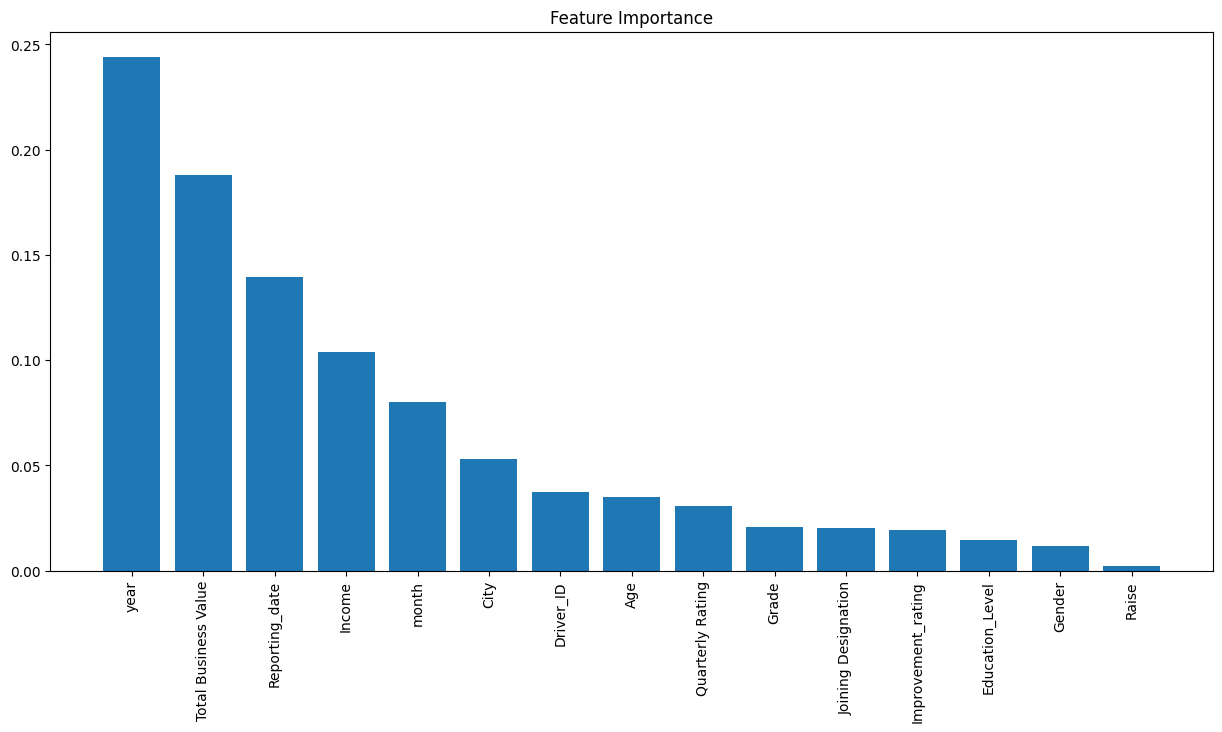

In [80]:
## Feature importance
# Feature importance
importances = RF_model_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train1.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train1.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train1.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

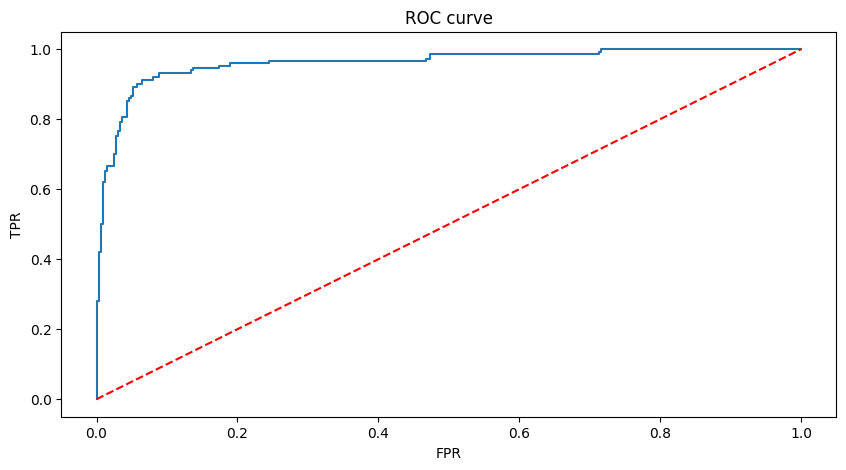

In [106]:
probability = RF_model_clf.predict_proba(X_test)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr)
#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [108]:
# ROC AUC score for RFC
RF_roc_auc_score=round(roc_auc_score(y_test,probabilites),3)
print("ROC_AUC score for RandomForest model is : ",RF_roc_auc_score)

ROC_AUC score for RandomForest model is :  0.961


In [109]:
y_pred = RF_model_clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[297,  30],
       [ 10, 140]], dtype=int64)

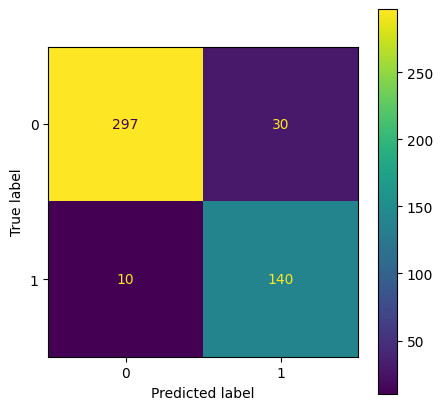

In [111]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [112]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       327
           1       0.82      0.93      0.87       150

    accuracy                           0.92       477
   macro avg       0.90      0.92      0.91       477
weighted avg       0.92      0.92      0.92       477



In [114]:
print("Precision Score is : ",round(precision_score(y_test, y_pred),2))
print("Recall Score is : ",round(recall_score(y_test, y_pred),2))
print("F1-Score is : ",round(f1_score(y_test, y_pred),2))

Precision Score is :  0.82
Recall Score is :  0.93
F1-Score is :  0.87


#### BOOSTING

##### GBDT

In [81]:
params = {
    "n_estimators": [50,100,150,200],
    "max_depth" : [3, 4, 5, 7],
    "max_leaf_nodes" : [20, 40, 80],
    "learning_rate": [0.1, 0.2, 0.3]
}

In [82]:

GBDT_model = GradientBoostingClassifier ()
clf = RandomizedSearchCV(GBDT_model, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

clf.fit(X_train1, y_train1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 7],
                                        'max_leaf_nodes': [20, 40, 80],
                                        'n_estimators': [50, 100, 150, 200]},
                   scoring='accuracy', verbose=1)

In [83]:
print(clf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_leaf_nodes=40,
                           n_estimators=50)


In [84]:
GBDT_model = clf.best_estimator_
GBDT_model.fit(X_train1, y_train1)

# Model accuracy of GBC
print("Model acc",GBDT_model.score(X_test, y_test))

Model acc 0.9056603773584906


In [86]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'n_estimators': 50, 'max_leaf_nodes': 40, 'max_depth': 7, 'learning_rate': 0.2} Mean_score: 0.9233783837152884 Rank: 1
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 80, 'max_depth': 3, 'learning_rate': 0.2} Mean_score: 0.9136757670130778 Rank: 8
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 80, 'max_depth': 4, 'learning_rate': 0.3} Mean_score: 0.919011571488214 Rank: 4
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 5, 'learning_rate': 0.3} Mean_score: 0.9224065705290952 Rank: 2
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 40, 'max_depth': 5, 'learning_rate': 0.3} Mean_score: 0.9151313710887693 Rank: 6
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 80, 'max_depth': 7, 'learning_rate': 0.1} Mean_score: 0.9199819742053417 Rank: 3
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 40, 'max_depth': 4, 'learning_rate': 0.2} Mean_score: 0.9160996581022984 Rank: 5
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 40, 'max_depth': 4, 'learnin

In [87]:
print(clf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_leaf_nodes=40,
                           n_estimators=50)


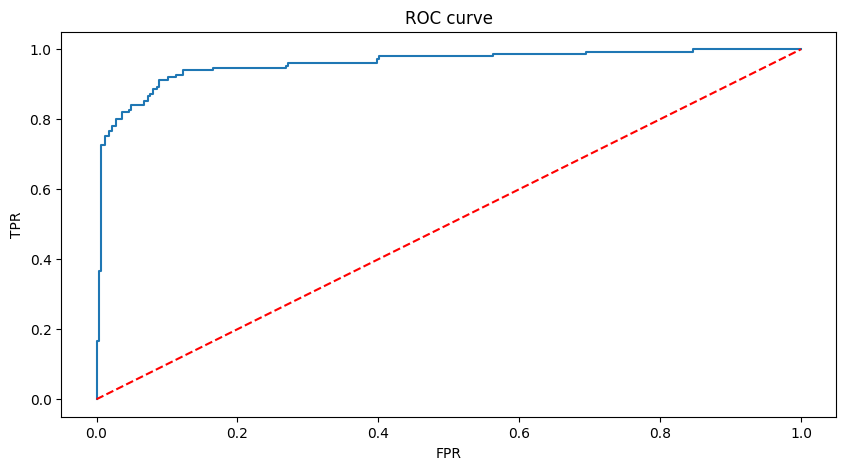

In [115]:
probability = GBDT_model.predict_proba(X_test)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr)
#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [116]:
# ROC AUC score for RFC
GBDT_roc_auc_score=round(roc_auc_score(y_test,probabilites),3)
print("ROC_AUC score for GBDT model is : ",GBDT_roc_auc_score)

ROC_AUC score for GBDT model is :  0.959


In [117]:
y_pred = GBDT_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[304,  23],
       [ 22, 128]], dtype=int64)

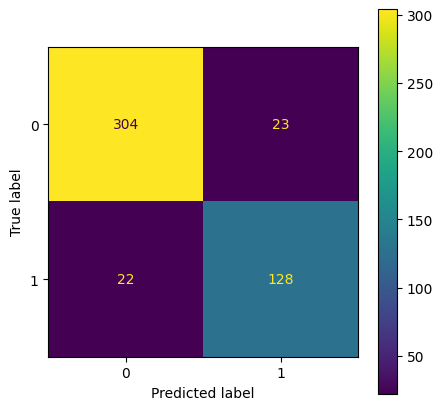

In [118]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [119]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       327
           1       0.85      0.85      0.85       150

    accuracy                           0.91       477
   macro avg       0.89      0.89      0.89       477
weighted avg       0.91      0.91      0.91       477



In [120]:
print("Precision Score is : ",round(precision_score(y_test, y_pred),2))
print("Recall Score is : ",round(recall_score(y_test, y_pred),2))
print("F1-Score is : ",round(f1_score(y_test, y_pred),2))

Precision Score is :  0.85
Recall Score is :  0.85
F1-Score is :  0.85


##### XGBOOST

In [96]:
params = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }

xgb = XGBClassifier()

In [97]:
# Use Random Search CV to get the best fitting hyperparameters for our boosting algorithm i.e XG Boost
random_search = RandomizedSearchCV(xgb,
                                   param_distributions=params,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=2)

random_search.fit(X_train1, y_train1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 7],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='accuracy', verbose=2)

In [98]:
# printing the best hyperparameters to be used to train our model
print(random_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [99]:
# Training our model using the best hyperparameters
xgb = random_search.best_estimator_

xgb.fit(X_train1, y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [100]:
# Model accuracy of RXGB
print("Model acc",xgb.score(X_test, y_test))

Model acc 0.9161425576519916


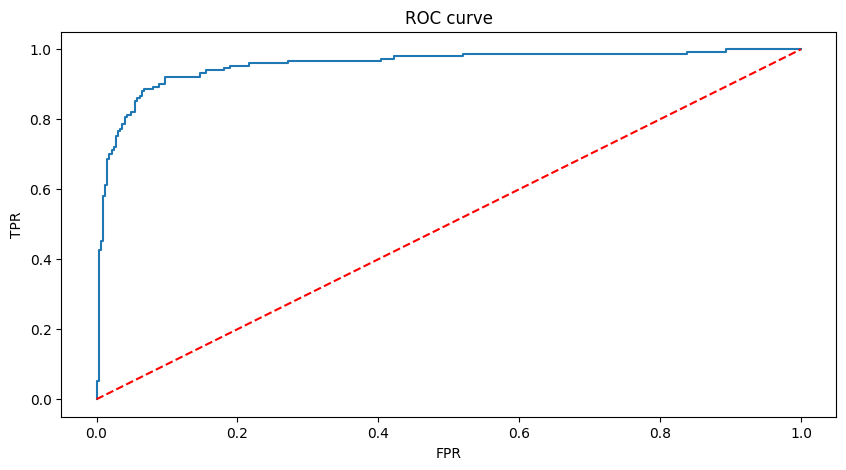

In [121]:
probability = xgb.predict_proba(X_test)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr)
#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [122]:
# ROC AUC score for RFC
XGBoost_roc_auc_score=round(roc_auc_score(y_test,probabilites),3)
print("ROC_AUC score for XGBoost model is : ",XGBoost_roc_auc_score)

ROC_AUC score for XGBoost model is :  0.956


In [123]:
y_pred = xgb.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[304,  23],
       [ 17, 133]], dtype=int64)

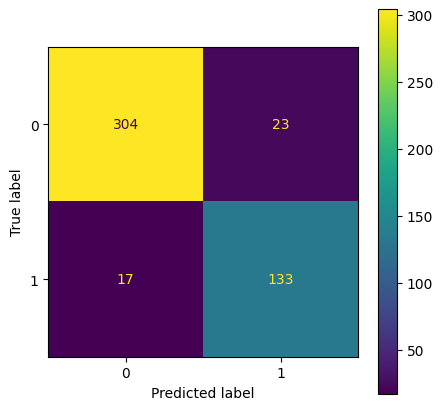

In [124]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [125]:
print(classification_report(y_test, y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       327
           1       0.85      0.89      0.87       150

    accuracy                           0.92       477
   macro avg       0.90      0.91      0.90       477
weighted avg       0.92      0.92      0.92       477



In [126]:
print("Precision Score is : ",round(precision_score(y_test, y_pred),2))
print("Recall Score is : ",round(recall_score(y_test, y_pred),2))
print("F1-Score is : ",round(f1_score(y_test, y_pred),2))

Precision Score is :  0.85
Recall Score is :  0.89
F1-Score is :  0.87


##### Recomendations and Insights

## Questionnaire :